<a href="https://colab.research.google.com/github/IsraelAbebe/Personal-Projects-and-Exercises/blob/master/Tutorials/Pytorch_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [**The Full Original Tutorial**](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
What is PyTorch?
================

It’s a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility
   and speed

1.Getting Started
---------------

Tensors
^^^^^^^

Tensors are similar to NumPy’s ndarrays, with the addition being that
Tensors can also be used on a GPU to accelerate computing.



In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# torch.empty()
torch.empty((2,3))

tensor([[1.0418e-36, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [0]:
# torch.rand() 
torch.rand((3,4))

tensor([[0.8748, 0.3659, 0.6738, 0.2064],
        [0.4392, 0.0259, 0.1725, 0.0797],
        [0.5208, 0.3706, 0.5188, 0.7093]])

In [0]:
# torch.zeros()
a = torch.zeros((2,3))
a

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [0]:
# torch.tensor()
torch.tensor([1,2,3])

tensor([1, 2, 3])

In [0]:
# torch.randn_like()
torch.rand_like(torch.tensor([1,2]))

RuntimeError: ignored

In [0]:
# size()
a.size()


torch.Size([2, 3])

In [0]:
# torch.add()
a = torch.rand(2,3)
b= torch.rand(2,3)

a+b==torch.add(a,b)

tensor([[True, True, True],
        [True, True, True]])

In [0]:
# item()
torch.rand(1).item()


0.6221966743469238

In [0]:
# a.numpy()
# torch.from_numpy()

a = np.array([1,2,3])
torch.from_numpy(a).numpy()


array([1, 2, 3])

In [0]:
torch.cuda.is_available()

True

In [0]:
%%time
a = torch.rand(1000,1000)
y = torch.rand_like(a)
for i in range(10):
    y = y**y

CPU times: user 120 ms, sys: 7.28 ms, total: 128 ms
Wall time: 143 ms


In [0]:
%%time
a = torch.rand(1000,1000)
y = torch.rand_like(a,device='cuda')
for i in range(10):
    y = y**y

CPU times: user 14.1 ms, sys: 0 ns, total: 14.1 ms
Wall time: 17 ms


# 2.Autograd: Automatic Differentiation


``` code
            def gradient(y,y_pred,x):
                    return np.dot(x.T,(y_pred-y))

```

In [0]:
x = torch.rand(1, requires_grad=True)
y = torch.rand(1, requires_grad=True)
z= torch.rand(1, requires_grad=True)

# print(x.grad,y.grad,z.grad)
print(x,y)

tensor([0.9855], requires_grad=True) tensor([0.7617], requires_grad=True)


In [0]:
one = x * y
two = one + z
three = torch.sigmoid(two)

print(three)

tensor([0.6800], grad_fn=<SigmoidBackward>)


In [0]:
three.backward()

print(x.grad,y.grad,z.grad)

tensor([0.1658]) tensor([0.2145]) tensor([0.2176])


# CNN

In [0]:
def get_shape(h,p=0,k=3,s=1):
    return ((h+(2*p)-k)/s)+1

In [0]:
get_shape(15,k=3)//2

6.0

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class Classification(nn.Module):
    def __init__(self):
        super(Classification,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=64,kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3)
        self.fc1 = nn.Linear(in_features=6*6*128,out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=10)
        


    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),2)
        x = F.max_pool2d(F.relu(self.conv2(x)),2)

        x = x.view(-1,6*6*128)

        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

    def num_flat_features(self,x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        
        return num_features



In [0]:
net =  Classification()
print(net)

Classification(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=4608, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
)


In [0]:
# from torchsummary import summary
# summary(net.to('cpu'), (3, 224, 224))

In [0]:
param = list(net.parameters())
param[0][0][0].size()

torch.Size([3, 3])

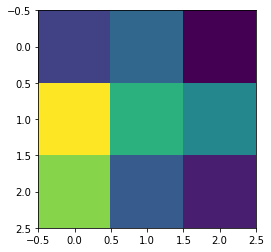

In [0]:
filter_0 = param[0][0][0].detach().numpy()
plt.imshow(filter_0)

In [0]:
input = torch.randn(1, 3, 32, 32)
out = net(input)
print(out.size())

torch.Size([1, 10])


In [0]:
# Zero the gradient buffers of all parameters and backprops with random gradients:

net.zero_grad()
out.backward(torch.randn(1, 10))

In [0]:
# Loss Function
output = net(input)
target = torch.randn(10)  
target = target.view(1, -1) 

criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.1329, grad_fn=<MseLossBackward>)


In [0]:
loss.backward()
# net.conv1.weight.grad

In [0]:
import torch.optim as optim

input = torch.randn(1, 3, 32, 32)
# out = net(input)
# print(out)

optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad() 
print(net.conv1.bias)  
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() 
print(net.conv1.bias) 

Parameter containing:
tensor([ 0.0319, -0.1847,  0.1321,  0.1601,  0.1747, -0.0614,  0.0558,  0.1318,
         0.1723, -0.0321, -0.0840, -0.0128, -0.0229, -0.1832,  0.0536, -0.0051,
        -0.0789,  0.0203,  0.0367, -0.0668, -0.1136, -0.0248,  0.0272,  0.0412,
         0.1873,  0.0217, -0.1794,  0.1771,  0.0285,  0.0814, -0.0187, -0.0419,
         0.1321, -0.0024,  0.1711, -0.0584,  0.0303, -0.1276,  0.0009, -0.1293,
        -0.1568,  0.1216, -0.1522,  0.1552,  0.1804,  0.0960,  0.0169,  0.1735,
         0.1071, -0.1186,  0.0078,  0.0920,  0.1814,  0.0403,  0.0856,  0.1532,
        -0.1165, -0.0417,  0.0517, -0.0437,  0.0653, -0.0970,  0.0696,  0.1524],
       requires_grad=True)
Parameter containing:
tensor([ 0.0319, -0.1846,  0.1321,  0.1602,  0.1748, -0.0615,  0.0557,  0.1319,
         0.1723, -0.0320, -0.0839, -0.0129, -0.0229, -0.1832,  0.0537, -0.0051,
        -0.0789,  0.0203,  0.0367, -0.0669, -0.1136, -0.0249,  0.0270,  0.0412,
         0.1872,  0.0217, -0.1793,  0.1772,  0.0

# TRAINING A CLASSIFIER 

[Cifar Data](https://www.cs.toronto.edu/~kriz/cifar.html)

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

https://pytorch.org/docs/stable/torchvision/transforms.html

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [0]:

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


```

        data_path = 'data/train/'
        train_dataset = torchvision.datasets.ImageFolder(
            root=data_path,
            transform=transform
        )
```

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

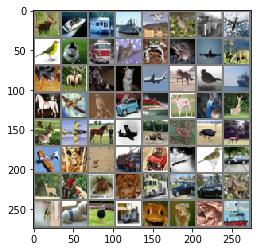

 deer  ship  ship  ship


In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
net =  Classification()
net = net

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Finished Training


In [0]:
PATH = './data/cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [0]:
ls 

data/  sample_data/


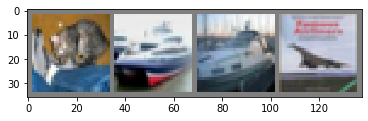

GroundTruth:    cat  ship  ship plane


In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
net = Classification()
net.load_state_dict(torch.load('./data/cifar_net.pth'))

<All keys matched successfully>

In [0]:
outputs = net(images)

In [0]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car plane


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %


In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 58 %
Accuracy of   car : 51 %
Accuracy of  bird : 24 %
Accuracy of   cat : 25 %
Accuracy of  deer : 62 %
Accuracy of   dog : 56 %
Accuracy of  frog : 52 %
Accuracy of horse : 75 %
Accuracy of  ship : 39 %
Accuracy of truck : 77 %


# **What can we do to improve our network?**